In [12]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/form_analysis3.0.csv')

In [ ]:
columns_to_convert = ['Visibility', 'Precision', 'Recall']
for column in columns_to_convert:
    df[column] = df[column].astype(str)
    df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='coerce')

# Статистическая значимость

In [ ]:
grouped = df.groupby('вид')

In [ ]:
average_metrics = df.groupby('вид')[['Visibility', 'Precision']].mean().reset_index()

average_metrics.columns = ['Группа', 'Среднее Visibility', 'Среднее Precision']

In [ ]:
average_metrics.to_csv('averages.csv')

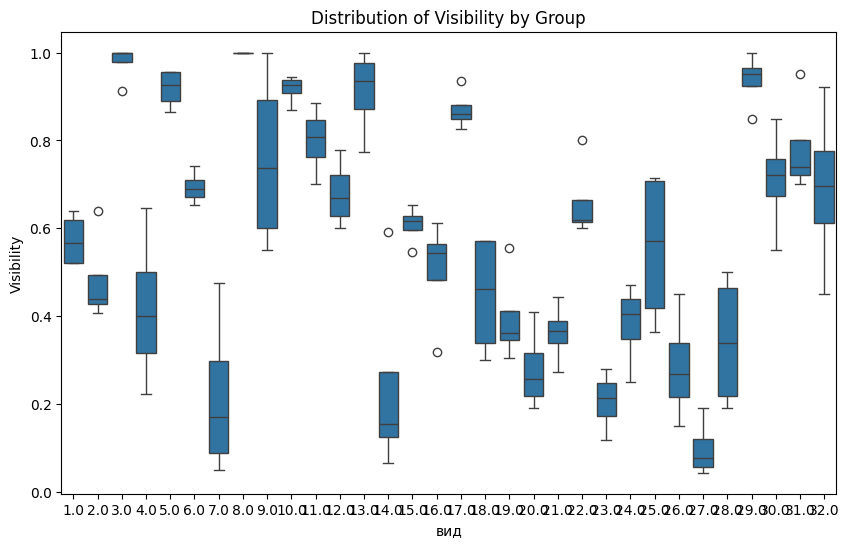

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='вид', y='Visibility', data=df)
plt.title('Distribution of Visibility by Group')
plt.show()

In [ ]:
selected_groups = [1, 2, 4, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32]

In [ ]:
significant_df = df[df['вид'].isin(selected_groups)]

In [ ]:
def analyze_group(group):
    visibility_values = group['Visibility'].values

    # Проверка на статистическую значимость
    t_stat_visibility, p_value_visibility = stats.ttest_1samp(visibility_values, 0)

    # Проверка на однородность значений
    visibility_mean = visibility_values.mean()

    variance_visibility = visibility_values.var(ddof=1)

    is_significant = (p_value_visibility < 0.05 and variance_visibility > 0)

    return pd.Series({
        'is_significant': is_significant,
        'visibility_mean': visibility_mean,
        'variance_visibility': variance_visibility
    })

In [ ]:
results = grouped.apply(analyze_group)
significant_groups = results[results['is_significant']]
non_significant_groups = results[~results['is_significant']]

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-14-0b11161dc6c2>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = grouped.apply(analyze_group)


In [ ]:
significant_view_ids = significant_groups.index.tolist()
non_significant_view_ids = non_significant_groups.index.tolist()
significant_df = df[df['вид'].isin(significant_view_ids)]
non_significant_df = df[df['вид'].isin(non_significant_view_ids)]

# Влияние дополнительных ошибок

In [ ]:
location_analysis = significant_df.groupby('place').agg({
    'Visibility': 'mean',
    'Precision': 'mean',
    'Recall': 'mean'
}).reset_index()
print(location_analysis)

   place  Visibility  Precision    Recall
0     -1    0.494972   0.548222  0.312972
1      0    0.584692   0.581077  0.377885
2      1    0.510125   0.591500  0.300312


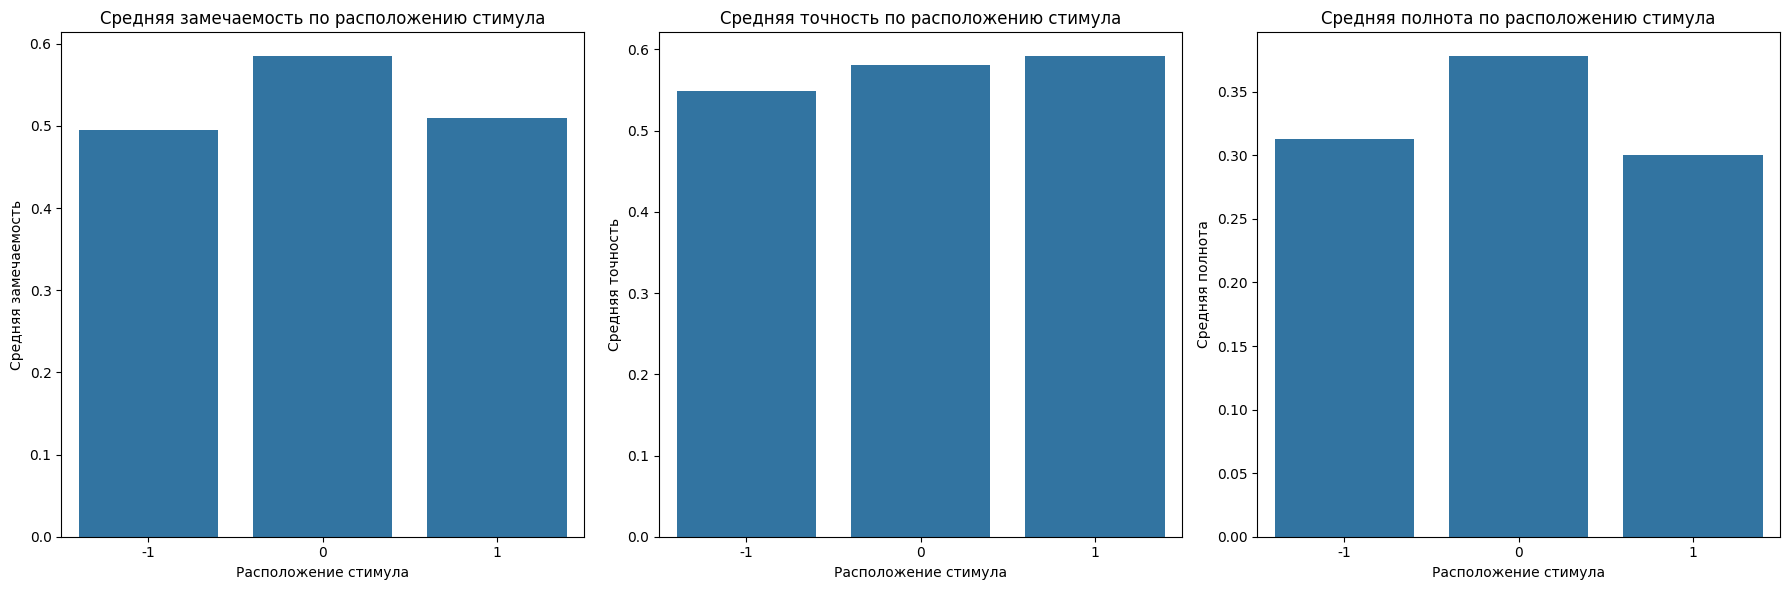

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=location_analysis, x='place', y='Visibility', ax=axes[0])
axes[0].set_title('Средняя замечаемость по расположению стимула')
axes[0].set_xlabel('Расположение стимула')
axes[0].set_ylabel('Средняя замечаемость')

sns.barplot(data=location_analysis, x='place', y='Precision', ax=axes[1])
axes[1].set_title('Средняя точность по расположению стимула')
axes[1].set_xlabel('Расположение стимула')
axes[1].set_ylabel('Средняя точность')

sns.barplot(data=location_analysis, x='place', y='Recall', ax=axes[2])
axes[2].set_title('Средняя полнота по расположению стимула')
axes[2].set_xlabel('Расположение стимула')
axes[2].set_ylabel('Средняя полнота')

plt.tight_layout()
plt.show()

In [ ]:
in_word_analysis = significant_df.groupby('in word (type)').agg({
    'Visibility': 'mean',
    'Precision': 'mean',
    'Recall': 'mean'
}).reset_index()
print(in_word_analysis)

  in word (type)  Visibility  Precision    Recall
0           Gram    0.453731   0.460577  0.247538
1             No    0.577288   0.576769  0.362365
2          Ortho    0.560346   0.671115  0.401654


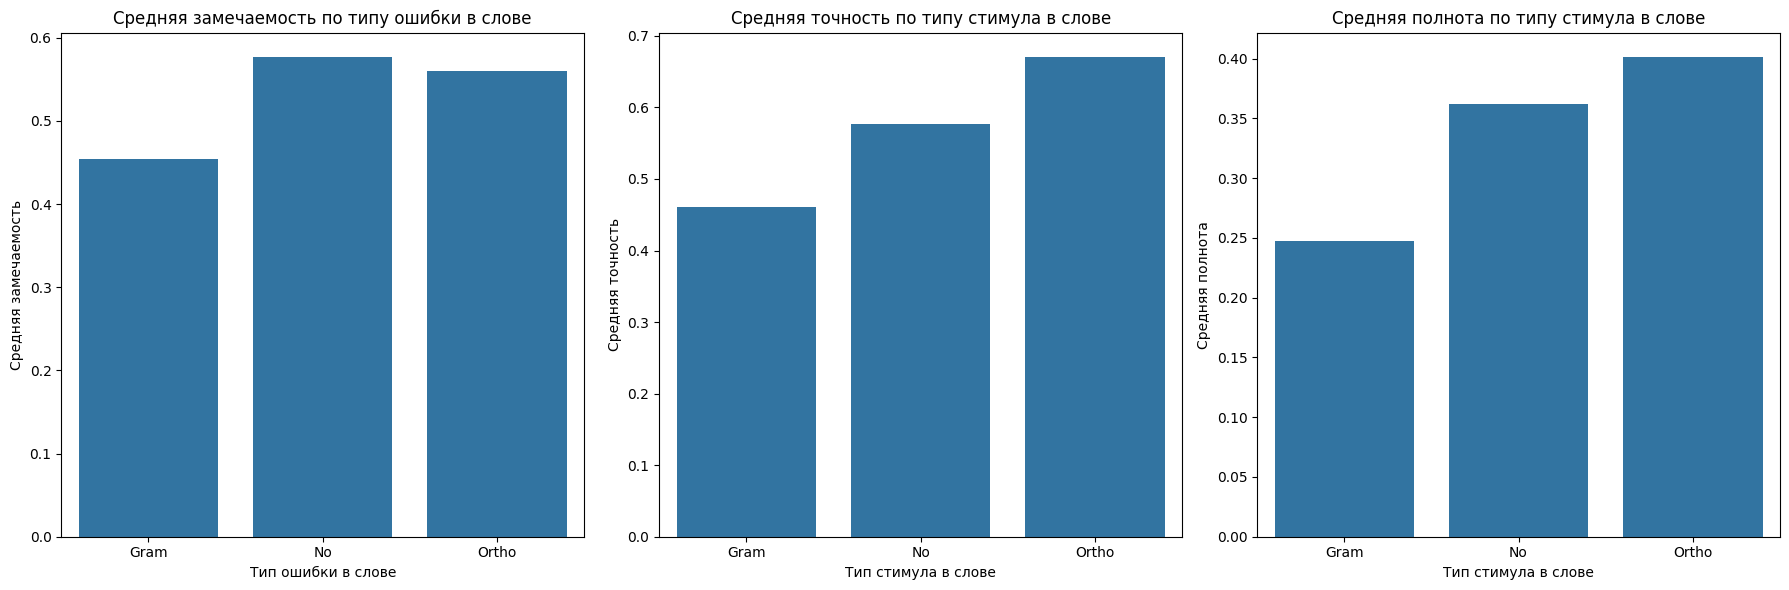

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=in_word_analysis, x='in word (type)', y='Visibility', ax=axes[0])
axes[0].set_title('Средняя замечаемость по типу ошибки в слове')
axes[0].set_xlabel('Тип ошибки в слове')
axes[0].set_ylabel('Средняя замечаемость')

sns.barplot(data=in_word_analysis, x='in word (type)', y='Precision', ax=axes[1])
axes[1].set_title('Средняя точность по типу стимула в слове')
axes[1].set_xlabel('Тип стимула в слове')
axes[1].set_ylabel('Средняя точность')

sns.barplot(data=in_word_analysis, x='in word (type)', y='Recall', ax=axes[2])
axes[2].set_title('Средняя полнота по типу стимула в слове')
axes[2].set_xlabel('Тип стимула в слове')
axes[2].set_ylabel('Средняя полнота')

plt.tight_layout()
plt.show()

In [ ]:
within_word_analysis = significant_df.groupby('within word (type)').agg({
    'Visibility': 'mean',
    'Precision': 'mean',
    'Recall': 'mean'
}).reset_index()
print(within_word_analysis)

  within word (type)  Visibility  Precision    Recall
0               Gram    0.506792   0.659500  0.360208
1                Lex    0.583167   0.528917  0.344250
2                 No    0.584692   0.581077  0.377885
3              Ortho    0.426250   0.439063  0.206000


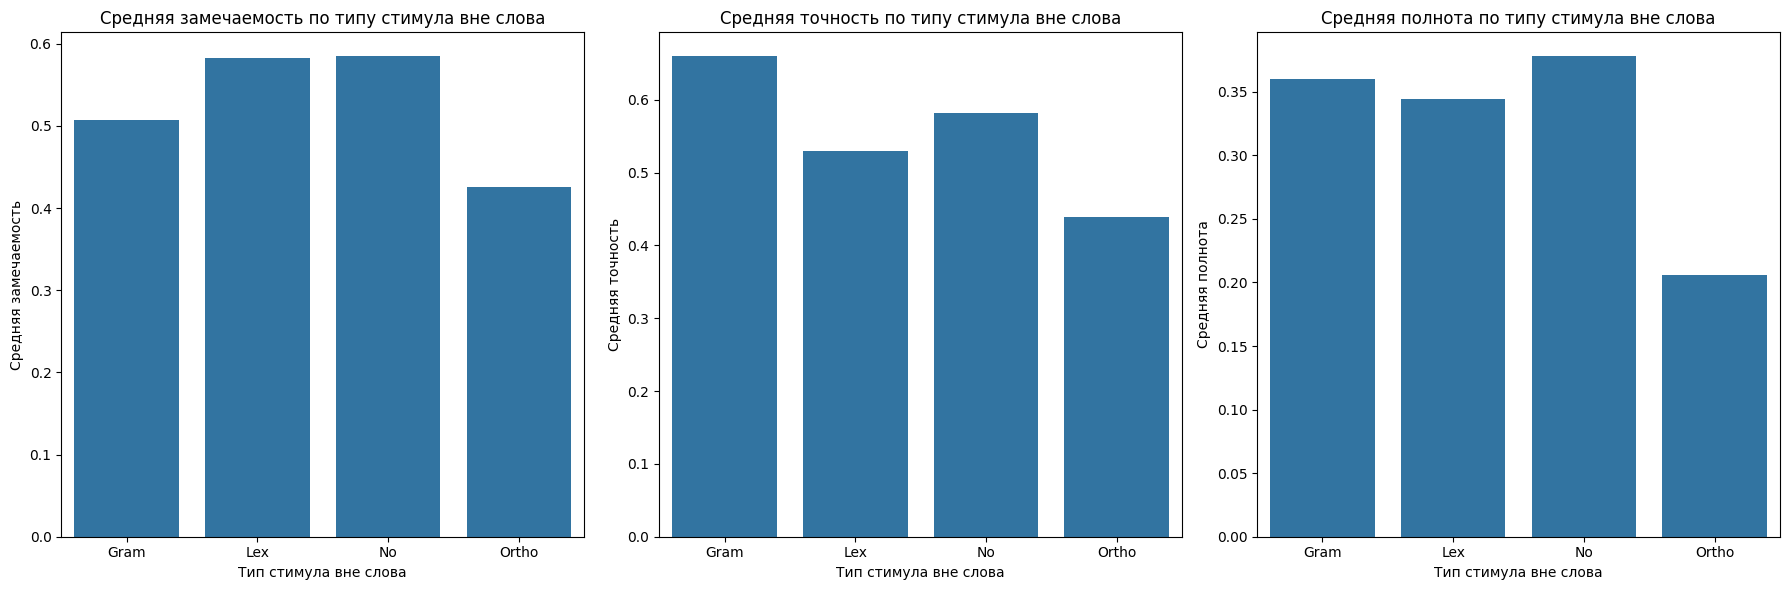

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=within_word_analysis, x='within word (type)', y='Visibility', ax=axes[0])
axes[0].set_title('Средняя замечаемость по типу стимула вне слова')
axes[0].set_xlabel('Тип стимула вне слова')
axes[0].set_ylabel('Средняя замечаемость')

sns.barplot(data=within_word_analysis, x='within word (type)', y='Precision', ax=axes[1])
axes[1].set_title('Средняя точность по типу стимула вне слова')
axes[1].set_xlabel('Тип стимула вне слова')
axes[1].set_ylabel('Средняя точность')

sns.barplot(data=within_word_analysis, x='within word (type)', y='Recall', ax=axes[2])
axes[2].set_title('Средняя полнота по типу стимула вне слова')
axes[2].set_xlabel('Тип стимула вне слова')
axes[2].set_ylabel('Средняя полнота')

plt.tight_layout()
plt.show()

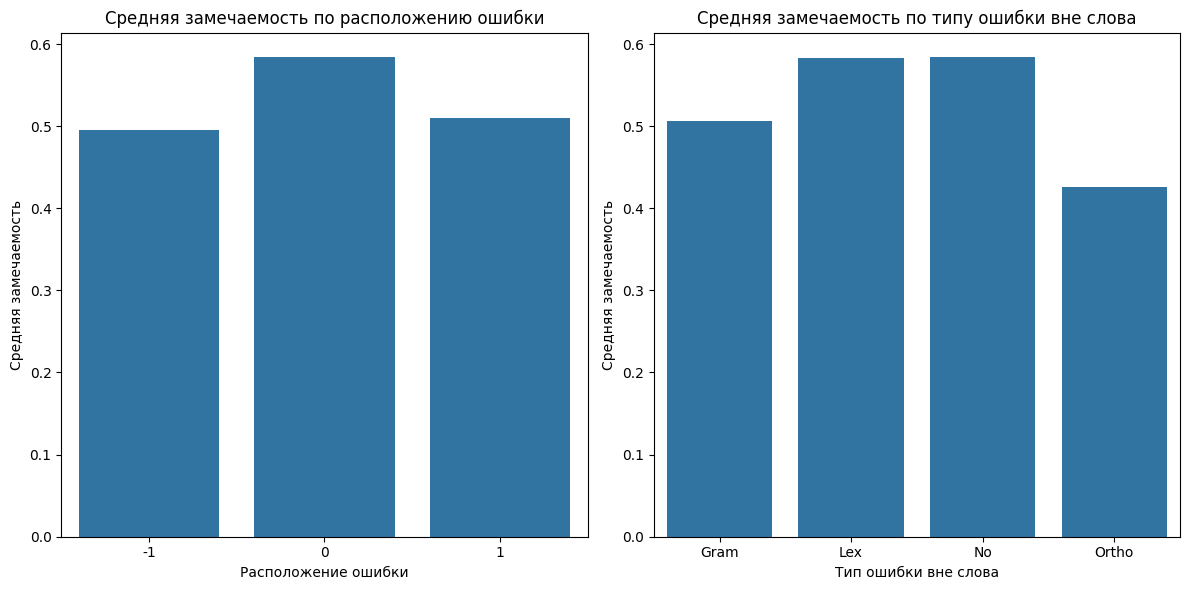

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=within_word_analysis, x='within word (type)', y='Visibility', ax=axes[1])
axes[1].set_title('Средняя замечаемость по типу ошибки вне слова')
axes[1].set_xlabel('Тип ошибки вне слова')
axes[1].set_ylabel('Средняя замечаемость')

sns.barplot(data=location_analysis, x='place', y='Visibility', ax=axes[0])
axes[0].set_title('Средняя замечаемость по расположению ошибки')
axes[0].set_xlabel('Расположение ошибки')
axes[0].set_ylabel('Средняя замечаемость')

plt.tight_layout()
plt.show()

In [ ]:
sentence_type_analysis = significant_df.groupby('тип предложения').agg({
    'Visibility': 'mean',
    'Precision': 'mean',
    'Recall': 'mean'
}).reset_index()

print(sentence_type_analysis)

   тип предложения  Visibility  Precision    Recall
0                1    0.626192   0.577808  0.392308
1                2    0.543192   0.584346  0.363462
2                3    0.528385   0.575731  0.332423
3                4    0.470885   0.547346  0.285731


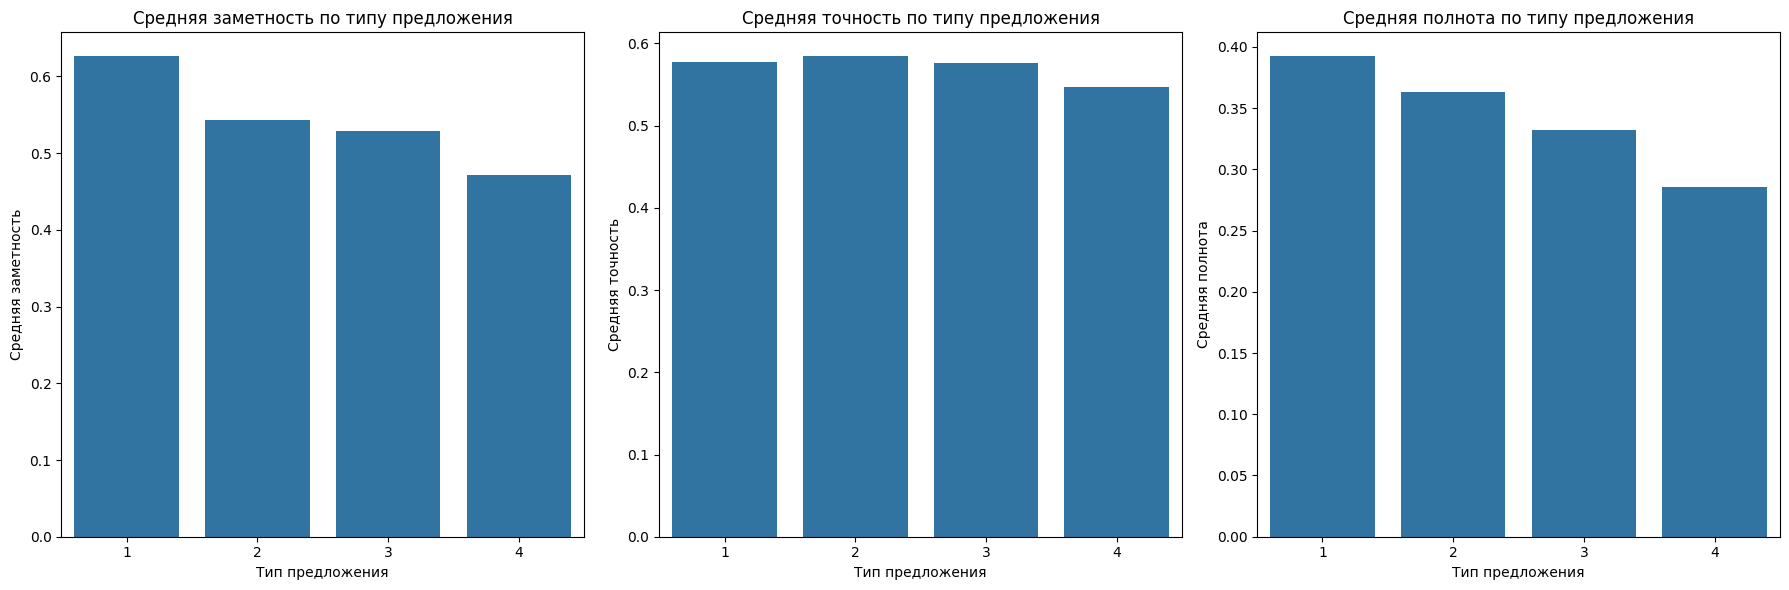

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=sentence_type_analysis, x='тип предложения', y='Visibility', ax=axes[0])
axes[0].set_title('Средняя заметность по типу предложения')
axes[0].set_xlabel('Тип предложения')
axes[0].set_ylabel('Средняя заметность')

sns.barplot(data=sentence_type_analysis, x='тип предложения', y='Precision', ax=axes[1])
axes[1].set_title('Средняя точность по типу предложения')
axes[1].set_xlabel('Тип предложения')
axes[1].set_ylabel('Средняя точность')

sns.barplot(data=sentence_type_analysis, x='тип предложения', y='Recall', ax=axes[2])
axes[2].set_title('Средняя полнота по типу предложения')
axes[2].set_xlabel('Тип предложения')
axes[2].set_ylabel('Средняя полнота')

plt.tight_layout()
plt.show()

In [ ]:
stimulus_analysis = significant_df.groupby(['within word (type)', 'place', 'in word (type)']).agg({
    'Visibility': 'mean',
    'Precision': 'mean',
    'Recall': 'mean'
}).reset_index()

print(stimulus_analysis)

   within word (type)  place in word (type)  Visibility  Precision    Recall
0                Gram   -1.0           Gram    0.525000   0.575500  0.380750
1                Gram   -1.0             No    0.528714   0.602143  0.398429
2                Gram   -1.0          Ortho    0.439667   0.798000  0.373000
3                Gram    1.0           Gram    0.480000   0.722000  0.380000
4                Gram    1.0             No    0.541200   0.698000  0.347200
5                Gram    1.0          Ortho    0.459000   0.661000  0.239333
6                 Lex   -1.0           Gram    0.472000   0.289000  0.139000
7                 Lex   -1.0             No    0.514500   0.545750  0.334500
8                 Lex   -1.0          Ortho    0.833000   1.000000  0.833000
9                 Lex    1.0             No    0.703000   0.545500  0.363000
10                Lex    1.0          Ortho    0.642500   0.603000  0.408500
11                 No    0.0           Gram    0.466154   0.483538  0.263923

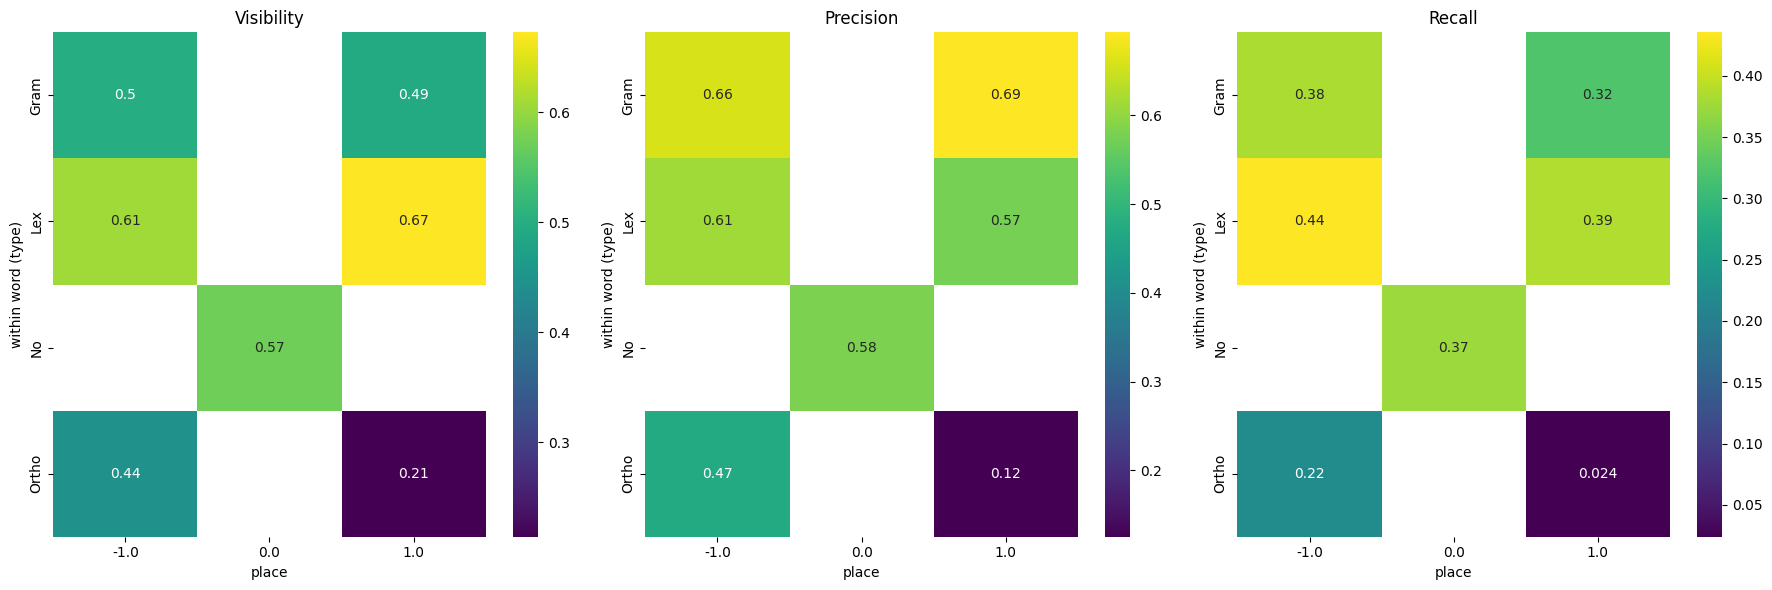

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

heatmap_data = stimulus_analysis.pivot_table(
    index='within word (type)',
    columns='place',
    values='Visibility',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, ax=axes[0], cmap='viridis')
axes[0].set_title('Visibility')

heatmap_data = stimulus_analysis.pivot_table(
    index='within word (type)',
    columns='place',
    values='Precision',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, ax=axes[1], cmap='viridis')
axes[1].set_title('Precision')

heatmap_data = stimulus_analysis.pivot_table(
    index='within word (type)',
    columns='place',
    values='Recall',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, ax=axes[2], cmap='viridis')
axes[2].set_title('Recall')

plt.tight_layout()
plt.show()

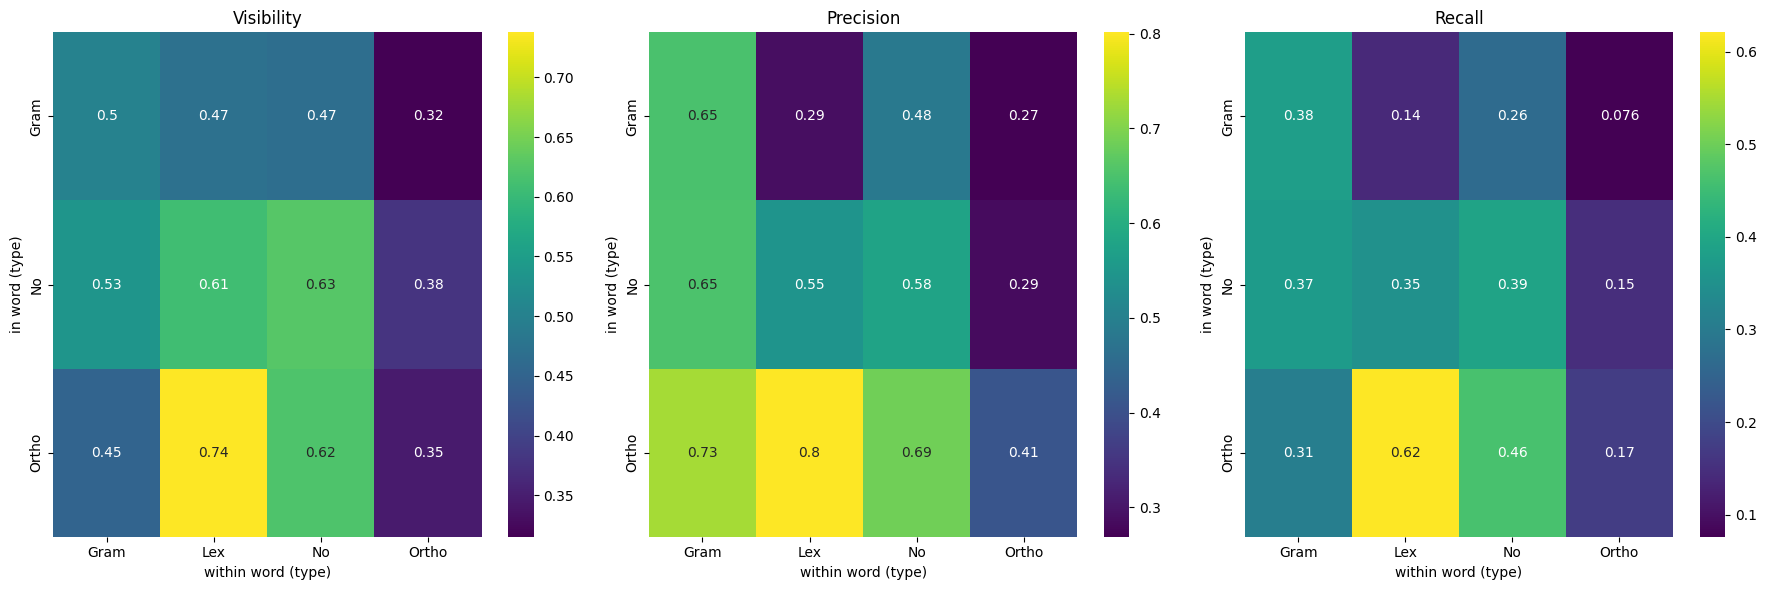

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

heatmap_data = stimulus_analysis.pivot_table(
    index='in word (type)',
    columns='within word (type)',
    values='Visibility',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, annot=True, ax=axes[0], cmap='viridis')
axes[0].set_title('Visibility')

heatmap_data = stimulus_analysis.pivot_table(
    index='in word (type)',
    columns='within word (type)',
    values='Precision',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, annot=True, ax=axes[1], cmap='viridis')
axes[1].set_title('Precision')

heatmap_data = stimulus_analysis.pivot_table(
    index='in word (type)',
    columns='within word (type)',
    values='Recall',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, annot=True, ax=axes[2], cmap='viridis')
axes[2].set_title('Recall')

plt.tight_layout()
plt.show()

# Попытки кластеризации

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
features = df[['Visibility', 'Precision']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
print(df.isnull().sum())

Gold                  0
word                  0
Variation             0
lextype               0
within word (type)    0
place                 0
in word (type)        0
тип предложения       0
вид                   0
Visibility            0
Precision             0
Recall                0
Cluster               0
Error_Group           0
dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=4)  # количество кластеров
df['Cluster'] = kmeans.fit_predict(scaled_features)

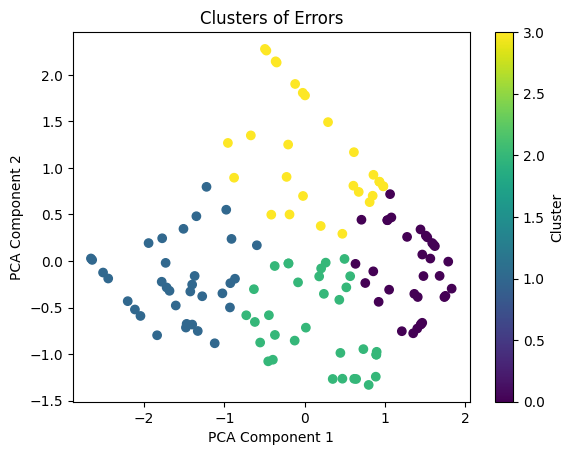

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clusters of Errors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
visibility_bins = [0, 0.3, 0.7, 1]
precision_bins = [0, 0.3, 0.7, 1]

In [ ]:
visibility_labels = ['Low', 'Medium', 'High']
precision_labels = ['Low', 'Medium', 'High']

In [ ]:
df['Visibility_Group'] = pd.cut(df['Visibility'], bins=visibility_bins, labels=visibility_labels, include_lowest=True)
df['Precision_Group'] = pd.cut(df['Precision'], bins=precision_bins, labels=precision_labels, include_lowest=True)

In [ ]:
df['Error_Group'] = df['Visibility_Group'].astype(str) + ' & ' + df['Precision_Group'].astype(str)

In [ ]:
df.drop(columns=['Visibility_Group', 'Precision_Group'], inplace=True)

тип предложения  1  2  3  4
Error_Group                
High & High      8  7  7  6
High & Low       1  0  1  0
High & Medium    6  4  4  3
Low & High       0  3  3  3
Low & Low        3  3  3  2
Low & Medium     1  1  1  3
Medium & High    5  5  5  5
Medium & Low     4  5  4  4
Medium & Medium  4  4  4  6


<Figure size 1200x600 with 0 Axes>

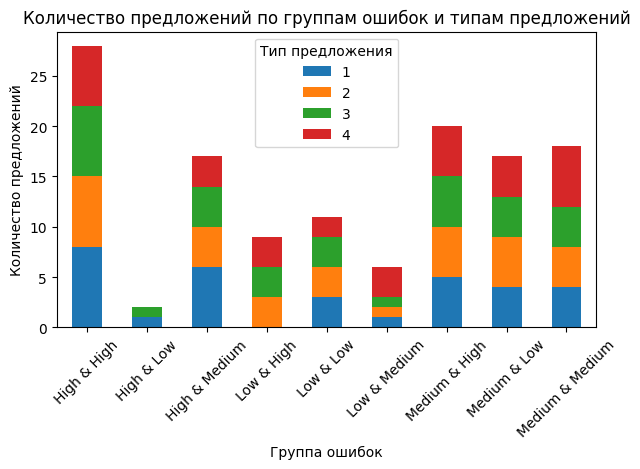

In [ ]:
group_analysis = df.groupby(['Error_Group', 'тип предложения']).size().unstack(fill_value=0)

print(group_analysis)

plt.figure(figsize=(12, 6))
group_analysis.plot(kind='bar', stacked=True)
plt.title('Количество предложений по группам ошибок и типам предложений')
plt.xlabel('Группа ошибок')
plt.ylabel('Количество предложений')
plt.legend(title='Тип предложения')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats2

In [ ]:
contingency_table = pd.crosstab(df['тип предложения'], df['Cluster'])
print(contingency_table)

Cluster           0   1   2  3
тип предложения               
1                10   7  10  5
2                 8   8   9  7
3                 8   7   9  8
4                 7  12   5  8


In [ ]:
chi2, p, dof, expected = stats2.chi2_contingency(contingency_table)
print(f"Хи-квадрат: {chi2}, p-значение: {p}, степени свободы: {dof}")
print("Ожидаемые значения:")
print(expected)

Хи-квадрат: 5.220779220779221, p-значение: 0.8146532646720837, степени свободы: 9
Ожидаемые значения:
[[8.25 8.5  8.25 7.  ]
 [8.25 8.5  8.25 7.  ]
 [8.25 8.5  8.25 7.  ]
 [8.25 8.5  8.25 7.  ]]


In [ ]:
alpha = 0.05
if p < alpha:
    print("Существует статистически значимая зависимость между типом предложения и группой.")
else:
    print("Нет статистически значимой зависимости между типом предложения и группой.")

Нет статистически значимой зависимости между типом предложения и группой.


In [ ]:
contingency_table = pd.crosstab(df['Cluster'], df['Error_Group'])
print(contingency_table)

Error_Group  High & High  High & Medium  Low & High  Low & Low  Low & Medium  \
Cluster                                                                        
0                      0              0           0          0             0   
1                      0              0           0          0             0   
2                      1              2           0          0             0   
3                     21              2           0          0             0   
4                      0              0           8          0             1   
5                      0              0           0          0             6   
6                      0              0           0         11             0   
7                      0             12           0          0             0   
8                      0              0           0          0             0   

Error_Group  Medium & High  Medium & Low  Medium & Medium  
Cluster                                                    

In [ ]:
chi2, p, dof, expected = stats2.chi2_contingency(contingency_table)
print(f"Хи-квадрат: {chi2}, p-значение: {p}, степени свободы: {dof}")
print("Ожидаемые значения:")
print(expected)

Хи-квадрат: 659.7549395127304, p-значение: 5.389306175597789e-104, степени свободы: 56
Ожидаемые значения:
[[2.578125  1.875     0.9375    1.2890625 0.8203125 1.9921875 2.2265625
  3.28125  ]
 [3.609375  2.625     1.3125    1.8046875 1.1484375 2.7890625 3.1171875
  4.59375  ]
 [2.75      2.        1.        1.375     0.875     2.125     2.375
  3.5      ]
 [3.953125  2.875     1.4375    1.9765625 1.2578125 3.0546875 3.4140625
  5.03125  ]
 [1.71875   1.25      0.625     0.859375  0.546875  1.328125  1.484375
  2.1875   ]
 [1.203125  0.875     0.4375    0.6015625 0.3828125 0.9296875 1.0390625
  1.53125  ]
 [2.578125  1.875     0.9375    1.2890625 0.8203125 1.9921875 2.2265625
  3.28125  ]
 [2.0625    1.5       0.75      1.03125   0.65625   1.59375   1.78125
  2.625    ]
 [1.546875  1.125     0.5625    0.7734375 0.4921875 1.1953125 1.3359375
  1.96875  ]]


In [ ]:
alpha = 0.05
if p < alpha:
    print("Существует статистически значимая зависимость между кластеризацией и группой.")
else:
    print("Нет статистически значимой зависимости между типом кластеризацией и группой.")

Существует статистически значимая зависимость между кластеризацией и группой.


In [ ]:
df.to_csv('new_dataset.csv')

In [ ]:
df_add = pd.read_csv('/content/form_analysis_add.csv')

In [ ]:
columns_to_convert = ['precision', 'visibility']
for column in columns_to_convert:
    df_add[column] = df_add[column].astype(str)
    df_add[column] = pd.to_numeric(df_add[column].str.replace(',', '.'), errors='coerce')

In [ ]:
features = df_add[['precision', 'visibility']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
print(df_add.isnull().sum())

Gold               0
word               0
error              0
wrong (LogDice)    7
right (LogDice)    7
wrong (t-score)    7
right (t-score)    7
lextype            0
visibility         0
precision          0
Cluster            0
dtype: int64


In [ ]:
kmeans = KMeans(n_clusters=9)  # количество кластеров
df_add['Cluster'] = kmeans.fit_predict(scaled_features)

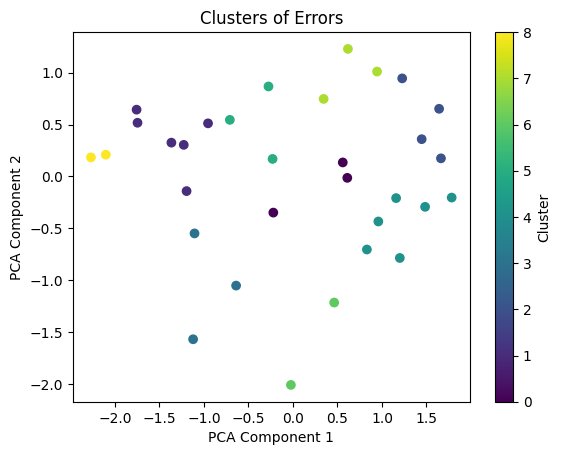

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df_add['Cluster'], cmap='viridis')
plt.title('Clusters of Errors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df_add['Cluster'].to_csv('meow.csv')

In [ ]:
df_add['Visibility_Group'] = pd.cut(df_add['visibility'], bins=visibility_bins, labels=visibility_labels, include_lowest=True)
df_add['Precision_Group'] = pd.cut(df_add['precision'], bins=precision_bins, labels=precision_labels, include_lowest=True)

In [ ]:
df_add['Error_Group'] = df_add['Visibility_Group'].astype(str) + ' & ' + df_add['Precision_Group'].astype(str)

In [ ]:
df_add.drop(columns=['Visibility_Group', 'Precision_Group'], inplace=True)

In [ ]:
contingency_table = pd.crosstab(df_add['Cluster'], df_add['Error_Group'])
print(contingency_table)

Error_Group  High & High  High & Medium  Low & High  Low & Low  Low & Medium  \
Cluster                                                                        
0                      0              1           0          0             0   
1                      0              0           0          0             0   
2                      3              1           0          0             0   
3                      0              0           0          0             3   
4                      3              0           0          0             0   
5                      0              0           0          0             0   
6                      0              0           1          0             0   
7                      0              3           0          0             0   
8                      0              0           0          2             0   

Error_Group  Medium & High  Medium & Low  Medium & Medium  
Cluster                                                    

In [ ]:
chi2, p, dof, expected = stats2.chi2_contingency(contingency_table)
print(f"Хи-квадрат: {chi2}, p-значение: {p}, степени свободы: {dof}")
print("Ожидаемые значения:")
print(expected)

Хи-квадрат: 154.93333333333334, p-значение: 3.2177590237069405e-11, степени свободы: 56
Ожидаемые значения:
[[0.5625  0.46875 0.09375 0.1875  0.28125 0.46875 0.46875 0.46875]
 [1.125   0.9375  0.1875  0.375   0.5625  0.9375  0.9375  0.9375 ]
 [0.75    0.625   0.125   0.25    0.375   0.625   0.625   0.625  ]
 [0.5625  0.46875 0.09375 0.1875  0.28125 0.46875 0.46875 0.46875]
 [1.125   0.9375  0.1875  0.375   0.5625  0.9375  0.9375  0.9375 ]
 [0.5625  0.46875 0.09375 0.1875  0.28125 0.46875 0.46875 0.46875]
 [0.375   0.3125  0.0625  0.125   0.1875  0.3125  0.3125  0.3125 ]
 [0.5625  0.46875 0.09375 0.1875  0.28125 0.46875 0.46875 0.46875]
 [0.375   0.3125  0.0625  0.125   0.1875  0.3125  0.3125  0.3125 ]]


In [ ]:
alpha = 0.05
if p < alpha:
    print("Существует статистически значимая зависимость между кластеризацией и группой.")
else:
    print("Нет статистически значимой зависимости между типом кластеризацией и группой.")

Существует статистически значимая зависимость между кластеризацией и группой.


In [ ]:
df_add['Error_Group'].to_csv('meow.csv')

# Влияние типа лексических ошибок

In [27]:
df_av = pd.read_csv('/content/form_analysis_average.csv')

In [28]:
columns_to_convert = ['visibility', 'precision', 'right (t-score)', 'right (LogDice)', 'semantics']
for column in columns_to_convert:
    df_av[column] = df_av[column].astype(str)
    df_av[column] = pd.to_numeric(df_av[column].str.replace(',', '.'), errors='coerce')

In [ ]:
better_data = df_av[df_av['lextype'] != 'paronyms']
better_data = better_data[better_data['lextype'] != 'collocations']

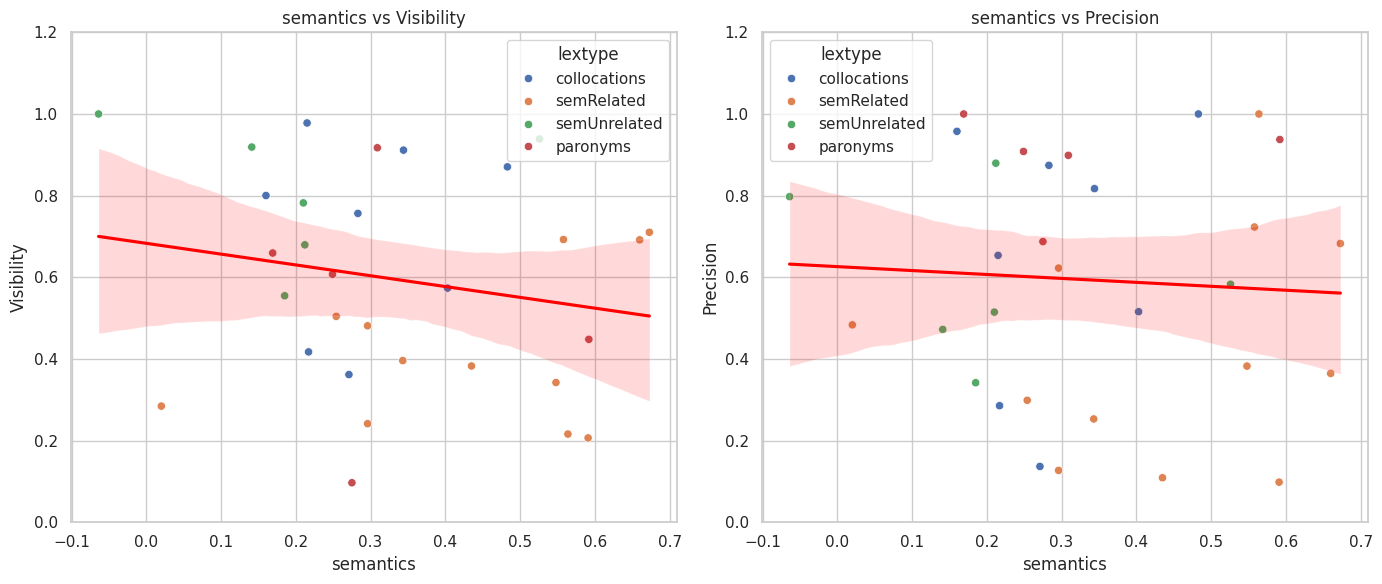

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.scatterplot(x='semantics', y='visibility', hue='lextype', data=df_av, alpha=1)

sns.regplot(x='semantics', y='visibility', data=df_av, scatter=False, line_kws={'color':'red'})
plt.title('semantics vs Visibility')
plt.xlabel('semantics')
plt.ylabel('Visibility')
plt.ylim(0, 1.2)


plt.subplot(1, 2, 2)

sns.scatterplot(x='semantics', y='precision', hue='lextype', data=df_av, alpha=1)

sns.regplot(x='semantics', y='precision', data=df_av, scatter=False, line_kws={'color':'red'})
plt.title('semantics vs Precision')
plt.xlabel('semantics')
plt.ylabel('Precision')
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()

In [25]:
pos_analysis = df_av.groupby('pos').agg({
    'visibility': 'mean',
    'precision': 'mean',
}).reset_index()
print(pos_analysis)

    pos  visibility  precision
0   adj    0.514500   0.490500
1   adv    0.647125   0.463125
2  noun    0.520000   0.587886
3  verb    0.679615   0.658538


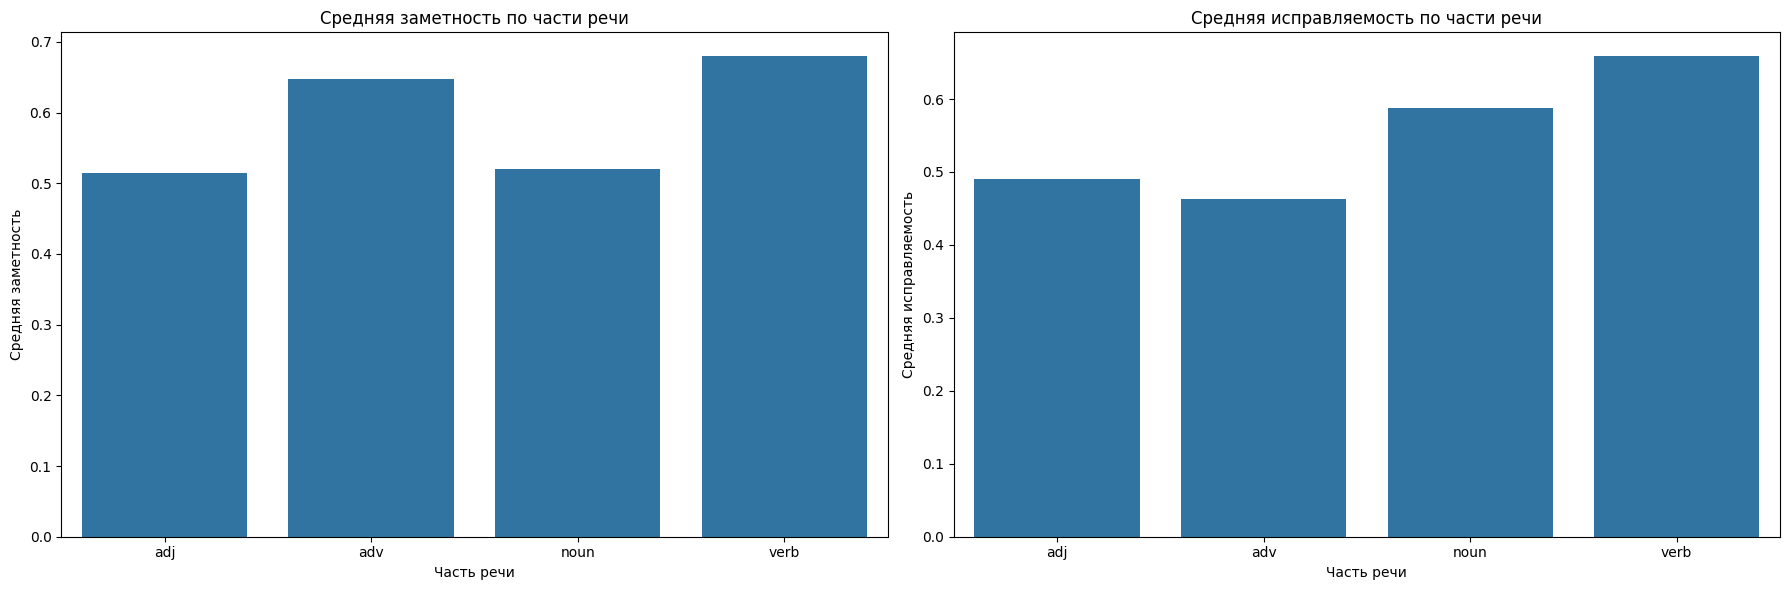

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=pos_analysis, x='pos', y='visibility', ax=axes[0])
axes[0].set_title('Средняя заметность по части речи')
axes[0].set_xlabel('Часть речи')
axes[0].set_ylabel('Средняя заметность')

sns.barplot(data=pos_analysis, x='pos', y='precision', ax=axes[1])
axes[1].set_title('Средняя исправляемость по части речи')
axes[1].set_xlabel('Часть речи')
axes[1].set_ylabel('Средняя исправляемость')

plt.tight_layout()
plt.show()

In [ ]:
lextype_analysis = df_av.groupby('lextype').agg({
    'visibility': 'mean',
    'precision': 'mean',
}).reset_index()
print(lextype_analysis)

        lextype  visibility  precision
0  collocations    0.708656   0.655094
1      paronyms    0.545750   0.886400
2    semRelated    0.429125   0.428750
3  semUnrelated    0.812375   0.598125


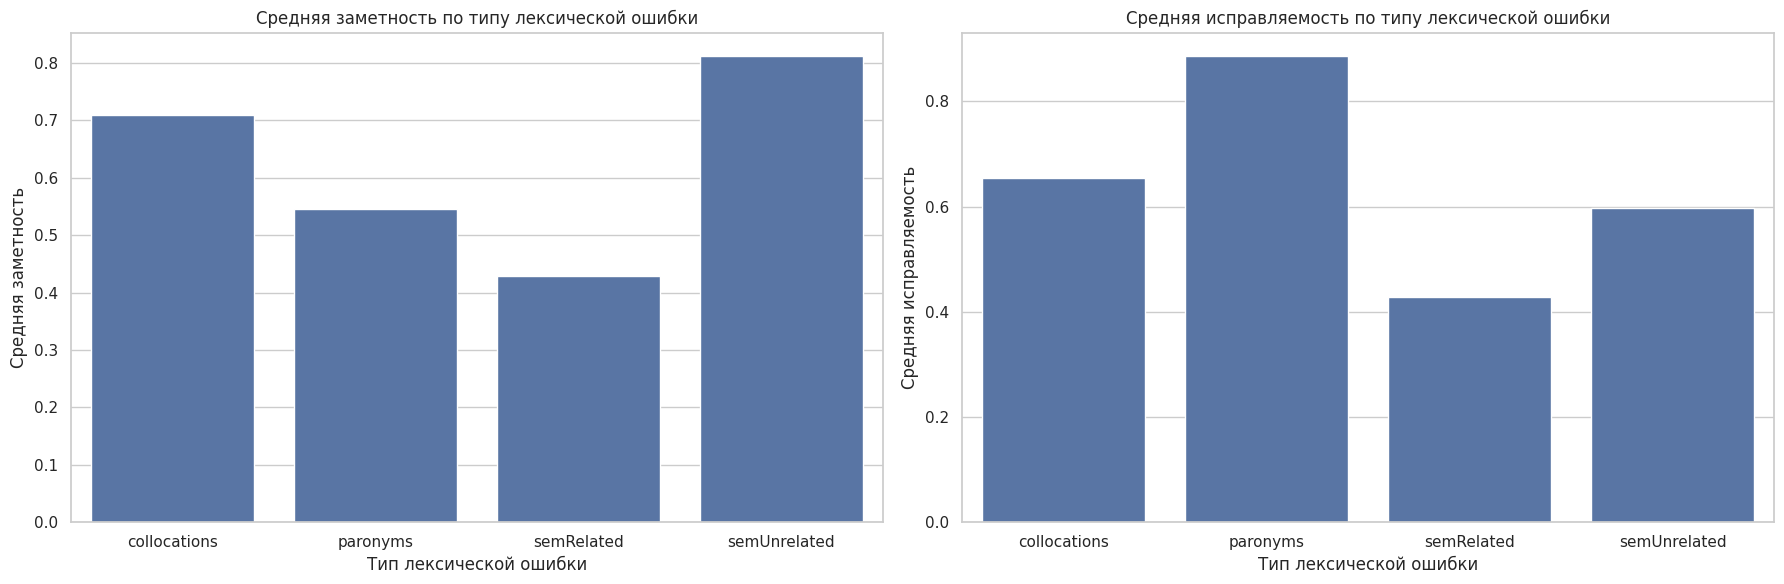

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=lextype_analysis, x='lextype', y='visibility', ax=axes[0])
axes[0].set_title('Средняя заметность по типу лексической ошибки')
axes[0].set_xlabel('Тип лексической ошибки')
axes[0].set_ylabel('Средняя заметность')

sns.barplot(data=lextype_analysis, x='lextype', y='precision', ax=axes[1])
axes[1].set_title('Средняя исправляемость по типу лексической ошибки')
axes[1].set_xlabel('Тип лексической ошибки')
axes[1].set_ylabel('Средняя исправляемость')

plt.tight_layout()
plt.show()

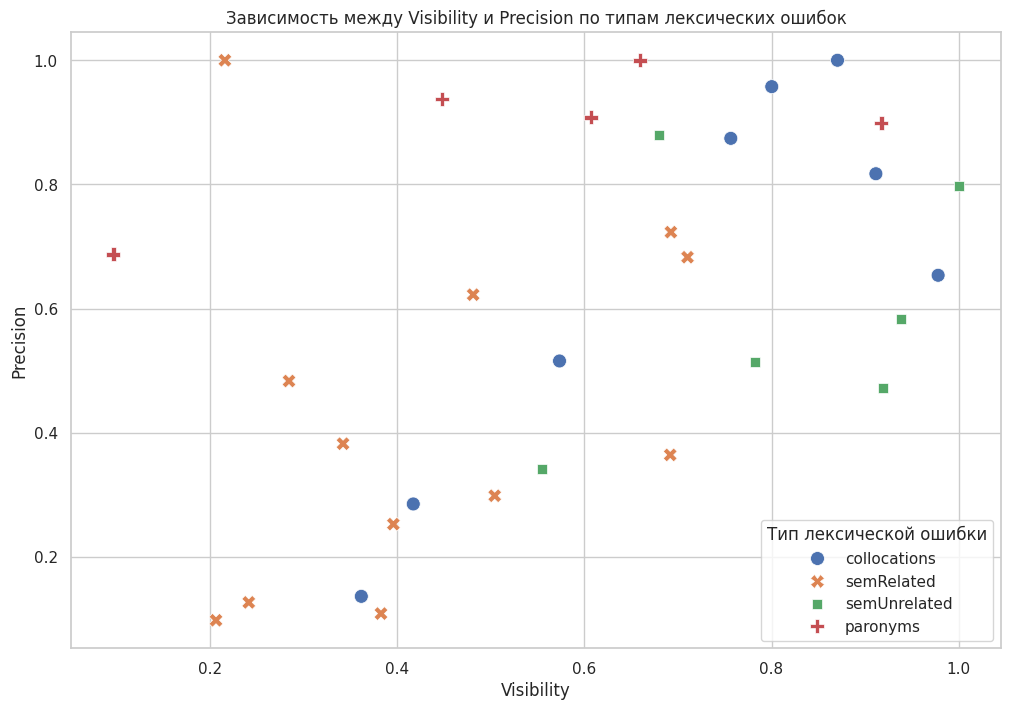

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_av, x='visibility', y='precision', hue='lextype', style='lextype',
                palette='deep', s=100, edgecolor='w', linewidth=0.5)

plt.title('Зависимость между Visibility и Precision по типам лексических ошибок')
plt.xlabel('Visibility')
plt.ylabel('Precision')
plt.legend(title='Тип лексической ошибки')
plt.grid(True)

plt.show()

In [13]:
df_type = pd.read_csv('/content/form_analysis_types.csv')

In [15]:
columns_to_convert = ['visibility', 'precision', 'right (t-score)', 'right (LogDice)', 'тип предложения']
for column in columns_to_convert:
    df_type[column] = df_type[column].astype(str)
    df_type[column] = pd.to_numeric(df_type[column].str.replace(',', '.'), errors='coerce')

In [19]:
types_analysis = df_type.groupby(['lextype', 'тип предложения']).agg({
    'visibility': 'mean',
    'precision': 'mean',}).reset_index()
print(types_analysis)

         lextype  тип предложения  visibility  precision
0   collocations                1    0.773625   0.688500
1   collocations                2    0.689625   0.628125
2   collocations                3    0.720625   0.697375
3   collocations                4    0.650750   0.606375
4       paronyms                1    0.673250   0.979250
5       paronyms                2    0.732000   0.972000
6       paronyms                3    0.608500   0.935750
7       paronyms                4    0.618250   0.857500
8     semRelated                1    0.508923   0.462385
9     semRelated                2    0.422154   0.434154
10    semRelated                3    0.386077   0.436000
11    semRelated                4    0.352846   0.459923
12  semUnrelated                1    0.891833   0.568167
13  semUnrelated                2    0.764500   0.680333
14  semUnrelated                3    0.841167   0.580167
15  semUnrelated                4    0.752000   0.563833


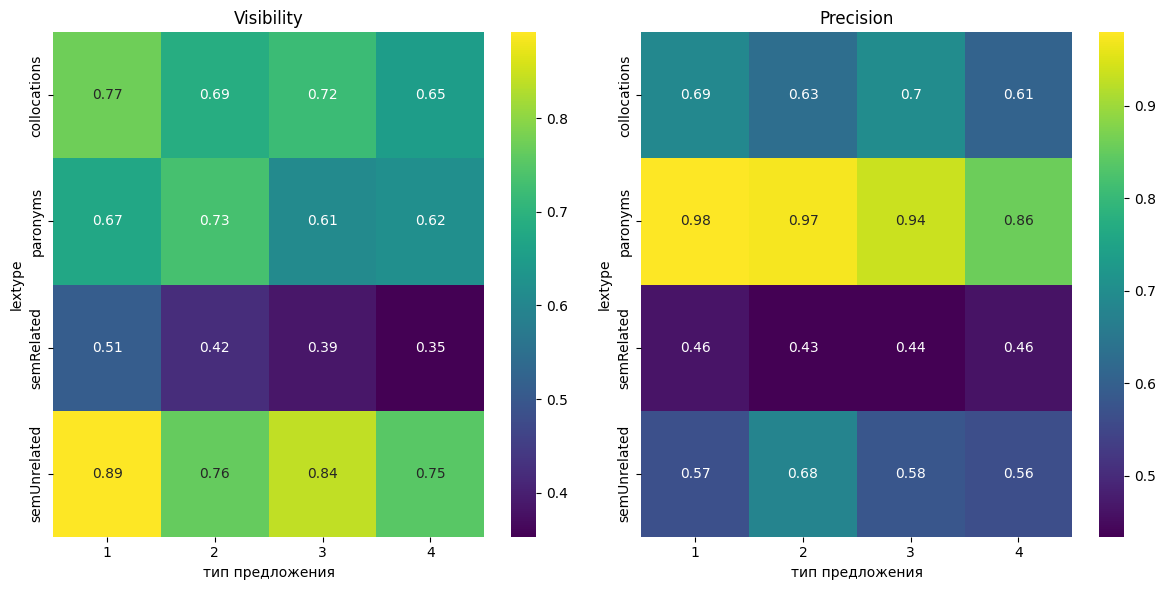

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

heatmap_data = types_analysis.pivot_table(
    index='lextype',
    columns='тип предложения',
    values='visibility',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, annot=True, ax=axes[0], cmap='viridis')
axes[0].set_title('Visibility')

heatmap_data = types_analysis.pivot_table(
    index='lextype',
    columns='тип предложения',
    values='precision',
    aggfunc='mean'
)

sns.heatmap(heatmap_data, annot=True, ax=axes[1], cmap='viridis')
axes[1].set_title('Precision')

plt.tight_layout()
plt.show()

In [ ]:
df_type_needed = df_type[df_type['тип предложения'] == 1] # написать нужный тип

In [ ]:
lextype_analysis = df_type_needed.groupby('lextype').agg({
    'visibility': 'mean',
    'precision': 'mean',
}).reset_index()
print(lextype_analysis)

        lextype  visibility  precision
0  collocations    0.773625   0.688500
1      paronyms    0.673250   0.979250
2    semRelated    0.508923   0.462385
3  semUnrelated    0.891833   0.568167


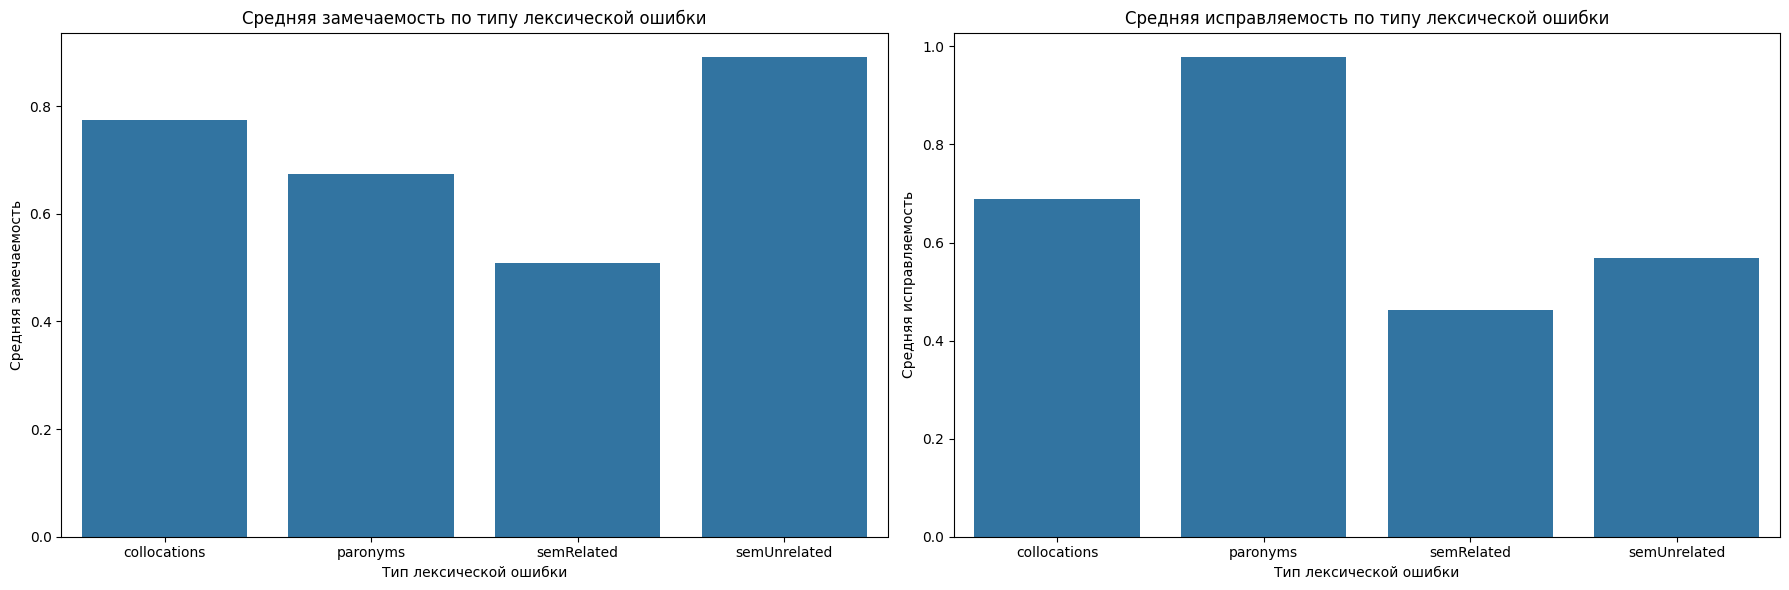

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=lextype_analysis, x='lextype', y='visibility', ax=axes[0])
axes[0].set_title('Средняя замечаемость по типу лексической ошибки')
axes[0].set_xlabel('Тип лексической ошибки')
axes[0].set_ylabel('Средняя замечаемость')

sns.barplot(data=lextype_analysis, x='lextype', y='precision', ax=axes[1])
axes[1].set_title('Средняя исправляемость по типу лексической ошибки')
axes[1].set_xlabel('Тип лексической ошибки')
axes[1].set_ylabel('Средняя исправляемость')

plt.tight_layout()
plt.show()

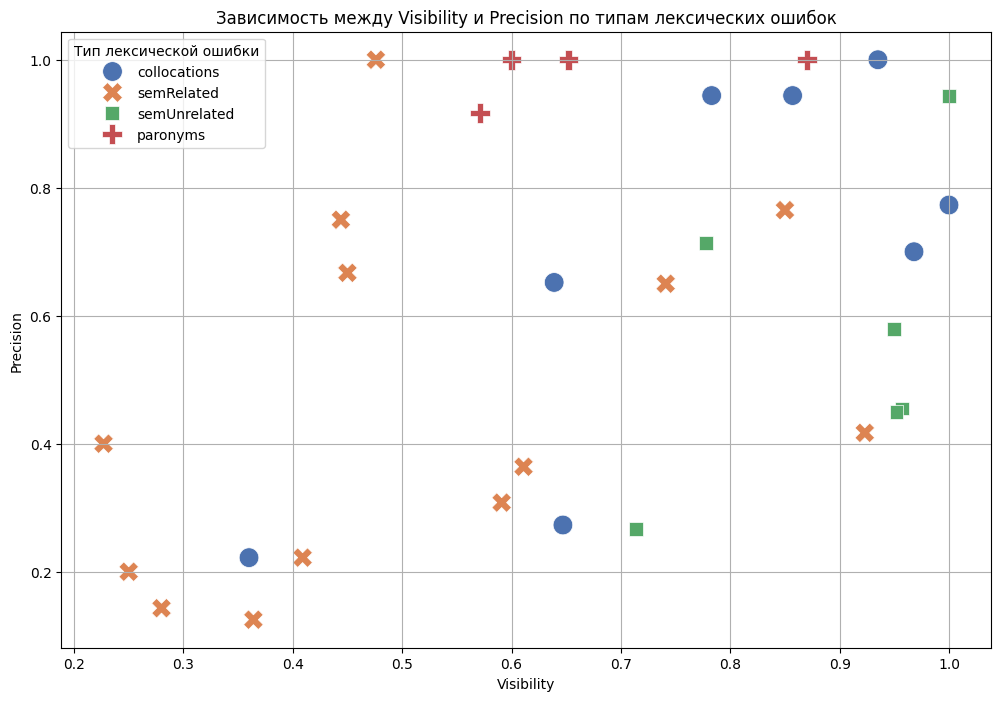

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_type_needed, x='visibility', y='precision', hue='lextype', style='lextype',
                palette='deep', s=200, edgecolor='w', linewidth=0.5)

plt.title('Зависимость между Visibility и Precision по типам лексических ошибок')
plt.xlabel('Visibility')
plt.ylabel('Precision')
plt.legend(title='Тип лексической ошибки')
plt.grid(True)

plt.show()

In [ ]:
filtered_data = df_av.dropna(subset=['right (t-score)'])
cleaned_data = filtered_data[filtered_data['right (t-score)'] <= 35]

In [ ]:
correlation_visibility = cleaned_data['right (t-score)'].corr(cleaned_data['visibility'])
correlation_precision = cleaned_data['right (t-score)'].corr(cleaned_data['precision'])

print(f'Корреляция между t-score и visibility: {correlation_visibility}')
print(f'Корреляция между t-score и precision: {correlation_precision}')

Корреляция между t-score и visibility: 0.3285380038616715
Корреляция между t-score и precision: 0.13474237313776702


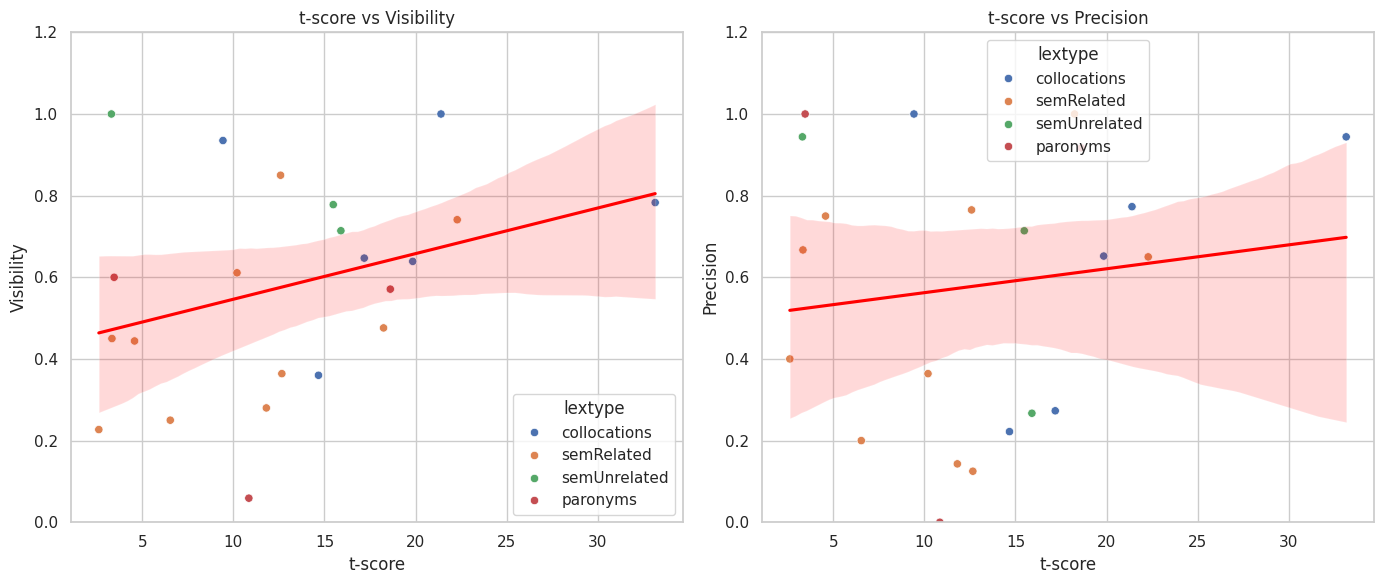

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.scatterplot(x='right (t-score)', y='visibility', hue='lextype', data=cleaned_data, alpha=1)

sns.regplot(x='right (t-score)', y='visibility', data=cleaned_data, scatter=False, line_kws={'color':'red'})
plt.title('t-score vs Visibility')
plt.xlabel('t-score')
plt.ylabel('Visibility')
plt.ylim(0, 1.2)

plt.subplot(1, 2, 2)

sns.scatterplot(x='right (t-score)', y='precision', hue='lextype', data=cleaned_data, alpha=1)

sns.regplot(x='right (t-score)', y='precision', data=cleaned_data, scatter=False, line_kws={'color':'red'})
plt.title('t-score vs Precision')
plt.xlabel('t-score')
plt.ylabel('Precision')
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()

In [ ]:
filtered_data1 = df_av.dropna(subset=['right (t-score)'])
right_data1 = filtered_data1[filtered_data1['lextype'] == 'paronyms']
cleaned_data1 = right_data1[right_data1['right (t-score)'] <= 35]

In [ ]:
correlation_visibility = cleaned_data1['right (t-score)'].corr(cleaned_data1['visibility'])
correlation_precision = cleaned_data1['right (t-score)'].corr(cleaned_data1['precision'])

print(f'Корреляция между t-score и visibility: {correlation_visibility}')
print(f'Корреляция между t-score и precision: {correlation_precision}')

Корреляция между t-score и visibility: -0.0335595017421072
Корреляция между t-score и precision: -0.060715444844512675


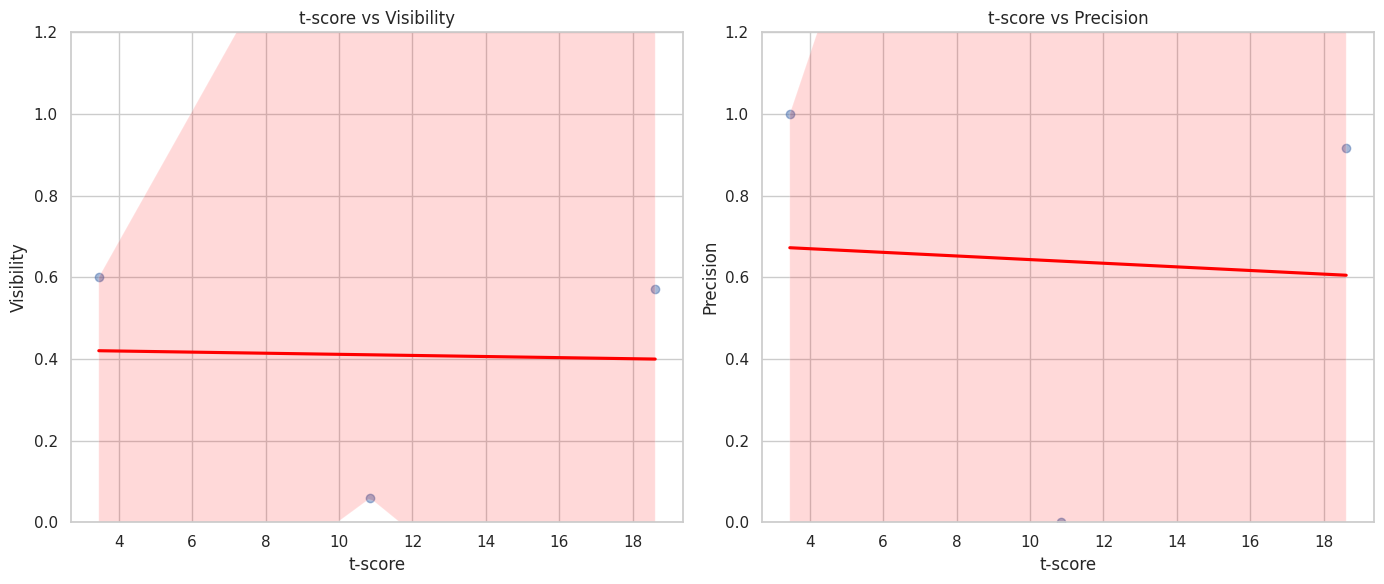

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='right (t-score)', y='visibility', data=cleaned_data1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('t-score vs Visibility')
plt.xlabel('t-score')
plt.ylabel('Visibility')
plt.ylim(0, 1.2)

plt.subplot(1, 2, 2)
sns.regplot(x='right (t-score)', y='precision', data=cleaned_data1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('t-score vs Precision')
plt.xlabel('t-score')
plt.ylabel('Precision')
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()